Visualizing the bivariate Gaussian distribution

The multivariate Gaussian distribution of an $n$ -dimensional vector $\boldsymbol{x}=\left(x_{1}, x_{2}, \cdots, x_{n}\right)$ may be written
$$
p(\boldsymbol{x} ; \boldsymbol{\mu}, \mathbf{\Sigma})=\frac{1}{\sqrt{(2 \pi)^{n}|\mathbf{\Sigma}|}} \exp \left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{\mathrm{T}} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right)
$$
where $\mu$ is the $n$ -dimensional mean vector and $\mathbf{\Sigma}$ is the $n \times n$ covariance matrix.
To visualize the magnitude of $p(\boldsymbol{x} ; \boldsymbol{\mu}, \mathbf{\Sigma})$ as a function of all the $n$ dimensions requires a plot in $n+1$ dimensions, so visualizing this distribution for $n>2$ is tricky. The code below calculates and visualizes the case of $n=2$, the bivariate Gaussian distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axis3d

Our 2-dimensional distribution will be over variables X and Y

In [2]:
N = 60
X = np.linspace(-3,3,N)
Y = np.linspace(-3,4,N)
X,Y = np.meshgrid(X,Y)

Mean vector and covariance matrix

In [3]:
mu = np.array([0,1])
sigma = np.array([[1.,-0.5],[-0.5,1.5]])

Pack X and Y into a single 3-dimensional array

In [4]:
pos = np.empty(X.shape + (2,))
pos[:,:,0] = X
pos[:,:,1] = Y

In [5]:
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

The matrix multiplication in the exponential is achieved with NumPy's einsum method. 


The distribution on the variables X, Y packed into pos.

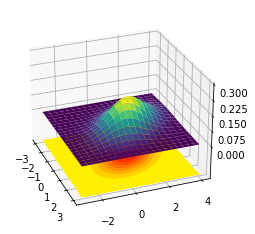

In [6]:
Z = multivariate_gaussian(pos,  mu,  sigma)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.viridis)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.autumn_r)
# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.3,5))
ax.view_init(27, -21)
plt.show()



Multivariate Normal Distribution

In [7]:
import numpy as np
from numba import njit
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'numba'

Assume that an $N \times 1$ random vector $z$ has a multivariate normal probability density.
This means that the probability density takes the form
$$
f(z ; \mu, \Sigma)=(2 \pi)^{-\left(\frac{N}{2}\right)} \operatorname{det}(\Sigma)^{-\frac{1}{2}} \exp \left(-.5(z-\mu)^{\prime} \Sigma^{-1}(z-\mu)\right)
$$
where $\mu=E z$ is the mean of the random vector $z$ and $\Sigma=E(z-\mu)(z-\mu)^{\prime}$ is the covariance matrix of $z$

In [8]:
def f(z, μ, Σ):
    """
    The density function of multivariate normal distribution.
    Parameters
    ---------------
    z: ndarray(float, dim=2)
        random vector, N by 1
    μ: ndarray(float, dim=1 or 2)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1
    """
    z = np.atleast_2d(z)
    μ = np.atleast_2d(μ)
    Σ = np.atleast_2d(Σ)

